In [1]:
#!pip install ewl

In [2]:
%matplotlib inline

In [3]:
from ewl import EWL
from ewl.ibmq import EWL_IBMQ
from ewl.parametrizations import U_theta_alpha_beta

import sympy as sp
from sympy import Array, Matrix
from sympy.physics.quantum.qubit import Qubit

from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel, pauli_error

sp.init_printing()
IBMQ.load_account()

i = sp.I
pi = sp.pi
sqrt2 = sp.sqrt(2)

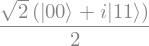

In [4]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2
psi

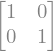

In [5]:
C = Matrix([
    [1, 0],
    [0, 1],
])
C

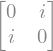

In [6]:
D = Matrix([
    [0, i],
    [i, 0],
])
D

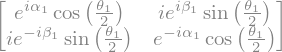

In [7]:
theta1, alpha1, beta1 = sp.symbols('theta1 alpha1 beta1', real=True)
alice = U_theta_alpha_beta(theta=theta1, alpha=alpha1, beta=beta1)
alice

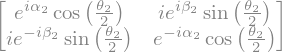

In [8]:
theta2, alpha2, beta2 = sp.symbols('theta2 alpha2 beta2', real=True)
bob = U_theta_alpha_beta(theta=theta2, alpha=alpha2, beta=beta2)
bob

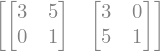

In [9]:
payoff_matrix = Array([
    [
        [3, 5],
        [0, 1],
    ],
    [
        [3, 0],
        [5, 1],
    ],
])
payoff_matrix

In [10]:
ewl = EWL(psi=psi, C=C, D=D, players=[alice, bob], payoff_matrix=payoff_matrix)
ewl

In [11]:
ewl_fixed = ewl.fix(theta1=pi / 2, alpha1=pi / 2, beta1=0,
                    theta2=0, alpha2=0, beta2=0)
ewl_fixed

In [12]:
p_error = 0.05
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])

In [13]:
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(bit_flip, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(phase_flip, ['x'], [0])
noise_model

<NoiseModel on ['u3', 'u1', 'x', 'u2']>

In [14]:
ewl_ibmq = EWL_IBMQ(ewl_fixed, noise_model=noise_model)
ewl_ibmq

{'00': 84, '10': 80, '11': 415, '01': 445}


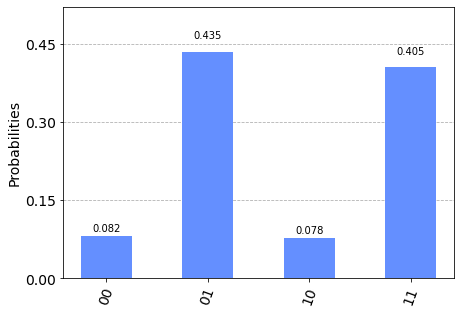

In [15]:
counts_qasm_simulator = ewl_ibmq.simulate_counts()
print(counts_qasm_simulator)
plot_histogram(counts_qasm_simulator)

Job Status: job has successfully run
{'00': 120, '01': 1780, '10': 154, '11': 1946}


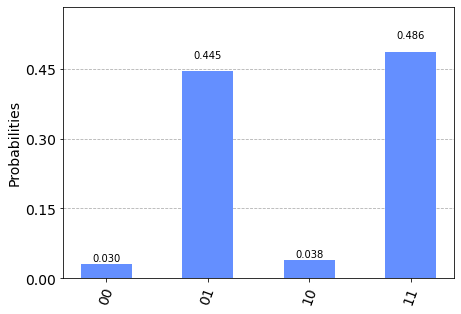

In [16]:
counts_quantum_device = ewl_ibmq.run()
print(counts_quantum_device)
plot_histogram(counts_quantum_device)

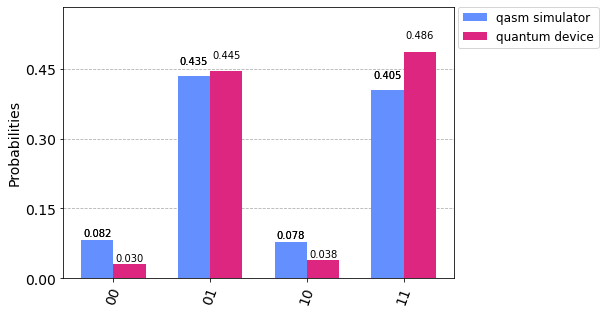

In [17]:
plot_histogram(data=[counts_qasm_simulator, counts_quantum_device],
               legend=['qasm simulator', 'quantum device'])